In [2]:
import pandas as pd

df = pd.read_csv("league_of_legends_champion_data.csv", sep=",")
print(df.shape)
df

(155, 7)


,story_full,story_short,name,race,role,secondary_role,region
0,While most look at Jinx and see only a mad wom...,"A manic and impulsive criminal from Zaun, Jinx...",Jinx,NaN,Marksman,NaN,zaun
1,One can travel to nearly any village across Io...,Jhin is a meticulous criminal psychopath who b...,Jhin,NaN,Marksman,Assassin,ionia
2,"Soon after King Jarvan III’s coronation, he ad...","As the king’s only son, Prince Jarvan is heir ...",Jarvan IV,NaN,Tank,Fighter,demacia
3,Ivern the Cruel was renowned as a fierce warri...,"Ivern, known to many as Bramblefoot or the Old...",Ivern,NaN,Support,Mage,ionia
4,"Since ancient times, there have been those who...","An ancient and mysterious wind spirit, Janna h...",Janna,NaN,Support,Mage,zaun
...,...,...,...,...,...,...,...
150,Anivia is an ancient Freljordian demi-god who ...,Anivia is a benevolent winged spirit who endur...,Anivia,NaN,Mage,Support,freljord
151,"Many civilizations have resisted Noxus, but no...",Always a mighty warrior with a fearsome reputa...,Alistar,NaN,Tank,Support,unaffiliated
152,A lonely and melancholy soul from ancient Shur...,Legend claims that Amumu is a lonely and melan...,Amumu,NaN,Tank,Mage,shurima
153,"Ahri’s origins are a mystery, even to her.She ...",Innately connected to the magic of the spirit ...,Ahri,Vastaya,Mage,Assassin,ionia


# Data
As we can see, we have __155__ rows of __champions__ and __7__ rows containing:
Stolpci so naslednji: 
1. whole story
2. short story
3. Champion's name
4. Race
5. Role
6. Secondary role
7. Region

In [3]:
df.isna().sum()

story_full          0
story_short         0
name                0
race              145
role                0
secondary_role     39
region              0
dtype: int64

39 champions do not have second role and there is 145 champions without a race.

Because we do not have a large dataset (because it does not exist), we appreciate every data, therefore we can not delete champions, that do not have race or the secondary role. 
*We are not going to predict race, because we do not have enough data*

Because we wont use champion's race, we will delete it form the dataset. 
We will also replace "unaffiliated" with "runeterra", so it is going to correspond to the actual region.

In [4]:
df.drop("race", axis=1, inplace=True)

df.replace(to_replace="unaffiliated", value="runeterra", inplace=True)

df

,story_full,story_short,name,role,secondary_role,region
0,While most look at Jinx and see only a mad wom...,"A manic and impulsive criminal from Zaun, Jinx...",Jinx,Marksman,NaN,zaun
1,One can travel to nearly any village across Io...,Jhin is a meticulous criminal psychopath who b...,Jhin,Marksman,Assassin,ionia
2,"Soon after King Jarvan III’s coronation, he ad...","As the king’s only son, Prince Jarvan is heir ...",Jarvan IV,Tank,Fighter,demacia
3,Ivern the Cruel was renowned as a fierce warri...,"Ivern, known to many as Bramblefoot or the Old...",Ivern,Support,Mage,ionia
4,"Since ancient times, there have been those who...","An ancient and mysterious wind spirit, Janna h...",Janna,Support,Mage,zaun
...,...,...,...,...,...,...
150,Anivia is an ancient Freljordian demi-god who ...,Anivia is a benevolent winged spirit who endur...,Anivia,Mage,Support,freljord
151,"Many civilizations have resisted Noxus, but no...",Always a mighty warrior with a fearsome reputa...,Alistar,Tank,Support,runeterra
152,A lonely and melancholy soul from ancient Shur...,Legend claims that Amumu is a lonely and melan...,Amumu,Tank,Mage,shurima
153,"Ahri’s origins are a mystery, even to her.She ...",Innately connected to the magic of the spirit ...,Ahri,Mage,Assassin,ionia


In [23]:
print("Number of champions with type of primary role")
gb_primary_role = df.groupby("role")
print(gb_primary_role.size())

print("\nNumber of champions with type of secodary role")
gb_secondary_role = df.groupby("secondary_role")
print(gb_secondary_role.size())

print("\nNumber of champions in each region")
gb_region = df.groupby("region")
print(gb_region.size())

Number of champions with type of primary role
role
Assassin    19
Fighter     42
Mage        34
Marksman    24
Support     17
Tank        19
dtype: int64

Number of champions with type of secodary role
secondary_role
Assassin    18
Fighter     29
Mage        25
Marksman     4
Melee        1
Support     15
Tank        24
dtype: int64

Number of champions in each region
region
bandle-city      7
bilgewater       7
demacia         14
freljord        14
ionia           21
ixtal            6
mount-targon     7
noxus           14
piltover         8
runeterra       19
shadow-isles     9
shurima          9
void             8
zaun            12
dtype: int64


### Primary role
The most frequent primary role is **Fighter**.
<br>
The least frequest primary roles are **Assassin** and **Tank**.

### Secodary role
We have 116 champions, that have secondary role.


The most frequent secondary role is **Fighter**.
<br>
The least frequest secodary role are **Melee**.

### Region
There's **13 regions in League of legends**. <br>
The most frequent is **Ionia** and the least frequent is **Ixtal**. 

## Data graphs

Number of champions in each region

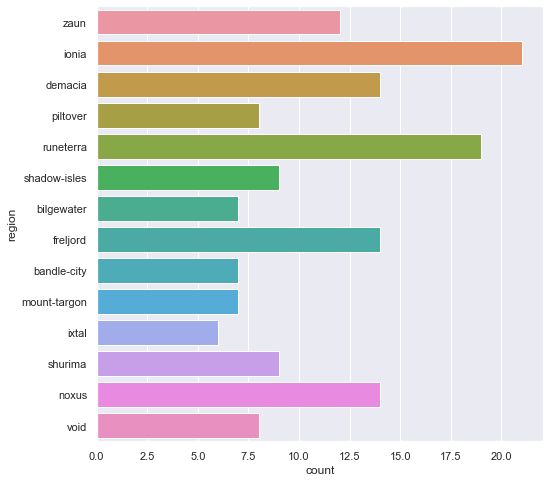

In [438]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8,8)})
graph = sns.countplot(y="region", data=df)


#### Number of champion with each primary role

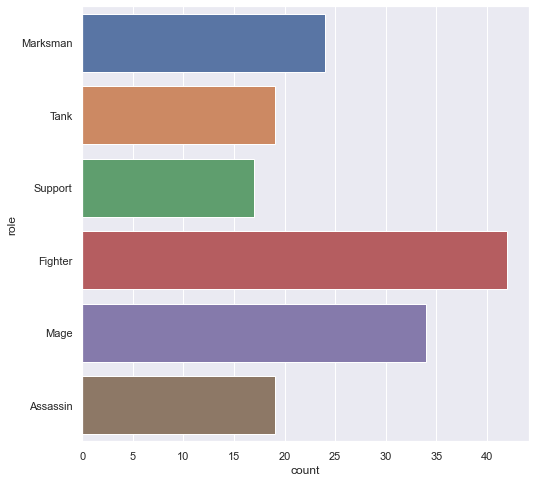

In [432]:
graph = sns.countplot(y="role", data=df)

#### Number of champions with each secondary role

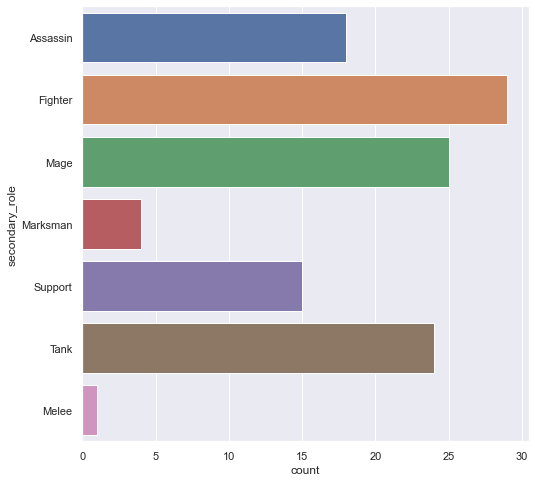

In [433]:
graph = sns.countplot(y="secondary_role", data=df)

# Text processing

first we import all needed libraries

In [120]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string 
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
#import nltk
#nltk.download()


stemmer = PorterStemmer()

We define needed functions.

first function **get_tokens_from_story** receives a string, which is a region name. Function then tokenizes and removes the stop words. Function returns all the tokens that are in the text.

Second function **get_tokens_from_data** receives a data list, which contains text we want to get tokens from. Function tokenizes the text and removes the stop words from it.

In [635]:
def get_tokens_from_story(region_name: string):
    champions_in_region = df.loc[df["region"] == region_name]
    whole_story_text = ""
    # put stories from all champions into 1 row
    for index, row in champions_in_region.iterrows():
        whole_story_text += (" " + row["story_full"])
    tokens = word_tokenize(whole_story_text)  
    tokens = [word.lower() for word in tokens]
    stop_list = stopwords.words('english') + list(string.punctuation)
    stop_list.append('’')
    stop_list.append(region_name)
    tokens_cleared = [token for token in tokens if token not in stop_list]
    tokens = [stemmer.stem(word) for word in tokens_cleared]
    return tokens

def get_tokens_from_data(data):
    tokens = word_tokenize(data)
    tokens = [word.lower() for word in tokens]
    stop_list = stopwords.words('english') + list(string.punctuation)
    stop_list.append('’')
    for name, row in gb_region:
        stop_list.append(name)
    tokens_cleared = [token for token in tokens if token not in stop_list]
    tokens = [stemmer.stem(word) for word in tokens_cleared]
    return " ".join(tokens)

Because there's most champion in region **Ionia**, let's check what are the most common unigrams, bigrams and trigrams for this region.

would : 63
could : 61
one : 45
spirit : 39
yasuo : 37
master : 36
zed : 36
noxian : 36
land : 36
even : 34


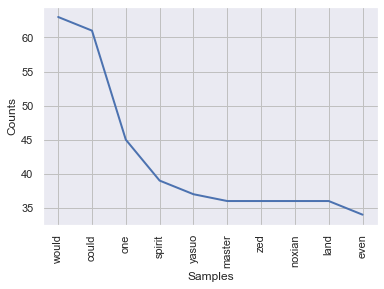

AxesSubplot(0.125,0.125;0.775x0.755)
('first', 'land') : 20
('great', 'master') : 8
('spirit', 'realm') : 8
('materi', 'realm') : 7
('elder', 'souma') : 7
('eye', 'twilight') : 7
('lee', 'sin') : 7
('golden', 'demon') : 6
('master', 'kusho') : 6
('order', 'shadow') : 6


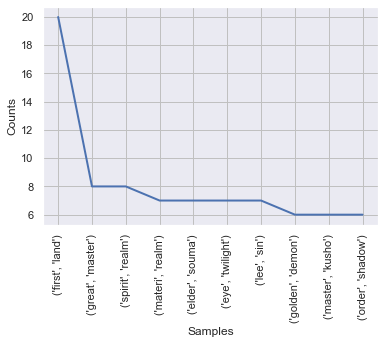

AxesSubplot(0.125,0.125;0.775x0.755)
('great', 'master', 'kusho') : 6
('spirit', 'materi', 'realm') : 3
('began', 'struggl', 'studi') : 2
('spirit', 'blossom', 'festiv') : 2
('jhin', 'young', 'zed') : 2
('peac', 'first', 'land') : 2
('renown', 'sword', 'school') : 2
('master', 'legendari', 'wind') : 2
('legendari', 'wind', 'techniqu') : 2
('elder', 'souma', 'death') : 2


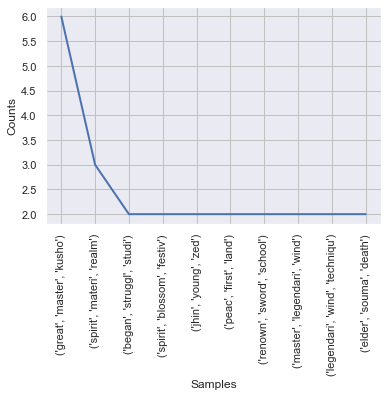

AxesSubplot(0.125,0.125;0.775x0.755)


In [636]:
from nltk import FreqDist, ngrams

ionia_tokens = get_tokens_from_story("ionia")
unigram = FreqDist(ionia_tokens)
for word, frequency in unigram.most_common(10):
  print(str(word),":",frequency)

print(unigram.plot(10, cumulative=False))

bigram = FreqDist(ngrams(ionia_tokens, 2))
for words, frequency in bigram.most_common(10):
  print(str(words),":",frequency)

print(bigram.plot(10, cumulative=False))

trigram = FreqDist(ngrams(ionia_tokens, 3))
for words, frequency in trigram.most_common(10):
  print(str(words),":",frequency)

print(trigram.plot(10, cumulative=False))


## Machine learning

Algorithm that we is used [MultinominalNB (Naive Bayes)](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).

We first vectorized all the data with TfidfVectorizer. We used only unigrams and bigrams, because if we encluded more, our precision dropped. 

Preprocessor is the function described above.

We used **67%** of the data for learning and **33%** for testing.

#### Whole story

If we use **story_full** to predict the region, we get about 73% accuracy which is very high, considering the small dataframe we had. 

In [637]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer(ngram_range=(1,2), preprocessor=get_tokens_from_data)
input_data = vectorizer.fit_transform(df['story_full'])

X_train, X_test, y_train, y_test_fs = train_test_split(input_data, df['region'], test_size=0.33, random_state=665)
clf = MultinomialNB(alpha=0.01)
clf.fit(X_train, y_train)

predictions_story_full = clf.predict(X_test)
print("Precision: ",accuracy_score(y_test_fs, predictions_story_full))

Precision:  0.7307692307692307


#### Story short
If we use **story_short** (which represents short story a of champion) to predict the region, we get about 38% precision.

In [638]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), preprocessor=get_tokens_from_data)
input_data = vectorizer.fit_transform(df['story_short'])

X_train, X_test, y_train, y_test = train_test_split(input_data, df['region'], test_size=0.33, random_state=665)
clf = MultinomialNB(alpha=0.01)
clf.fit(X_train, y_train)
predictions_story_short = clf.predict(X_test)
print("Precision: ",accuracy_score(y_test, predictions_story_short))

Precision:  0.38461538461538464


#### Full story - predicting role
If we use **story_full** (which represents full story of a champion) to predict the region, we get about 30% precision.

In [639]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), preprocessor=get_tokens_from_data)
input_data = vectorizer.fit_transform(df['story_full'])

X_train, X_test, y_train, y_test = train_test_split(input_data, df['role'], test_size=0.33, random_state=22)
clf = MultinomialNB(alpha=0.2)
clf.fit(X_train, y_train)
predictions_role = clf.predict(X_test)
print("Precision: ",accuracy_score(y_test, predictions_role))

Precision:  0.3076923076923077


We can not predict the role depending on the full story, because we get same result, as if we said that every champion is a **Fighter**

Below we can see that the accuracy is the same if we use our algorithm or if we say that every champion is a **Fighter**. 

In [640]:
#Function that counts how many times algorithm has been correct
def checkBothRoles(prediction: pd.Series, data: pd.DataFrame):
    correctTimes = 0
    i = 0
    for index, row in y_test.items():
        pri_role = data.iloc[index]["role"]
        sec_role = data.iloc[index]["secondary_role"]
        if (pri_role == predictions_role[i]) or (sec_role == predictions_role[i]):
            correctTimes+=1
        i+=1
    return correctTimes

#Function that returns secondary roles of testing data
def checkSecRoles(prediction: pd.Series, data: pd.DataFrame):
    roles=[]
    i = 0
    for index, row in y_test.items():
        sec_role = data.iloc[index]["secondary_role"]
        roles.append(sec_role)
        i+=1
    return roles

In [641]:
onlyFighters = []
for index in range(len(predictions_role)):
    onlyFighters.append("Fighter")    
print(checkBothRoles(predictions_role, df))
print(checkBothRoles(pd.Series(data=onlyFighters),df))


28
28


# Predicting role - results

On the left graph, we can see what algorith predicted and on the right graph, we can see actual primary role. We learned our alogithm with primary roles only.

If we remember from the beginning we had 71 Fighters in total.

On the first graph, we can see the actual classification of our test data. On the second graph we can see primary roles of the test data and on the third graph we can see secondary roles of the test data.

We have 25 Fighters and 19 Mages.

<AxesSubplot:ylabel='count'>

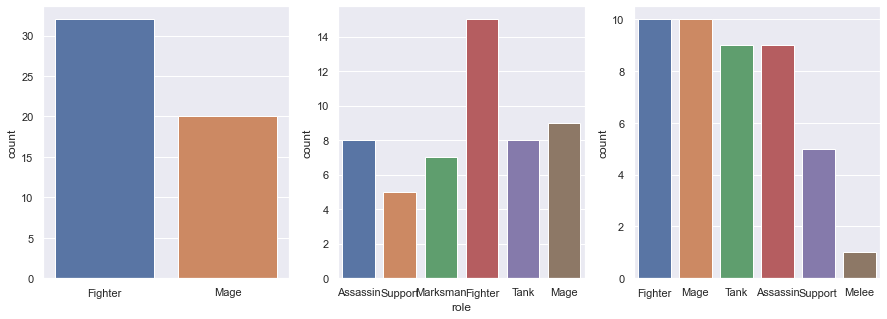

In [653]:
fig, ax =plt.subplots(1,3)
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x=predictions_role, ax=ax[0])
sns.countplot(x=y_test,ax=ax[1])
sns.countplot(x=checkSecRoles(predictions_role,df),ax=ax[2])

# Predicting region - results

We tried using different combinations of unigrams, bigrams and trigrams; but any other combination of those reduced the accuracy, so we decided to use only unigrams and bigrams. 

In first two graphs, we can see the difference between predicted and actual graphs. 

We can see that it's not totally different, but there are some differences. 

<AxesSubplot:xlabel='count', ylabel='region'>

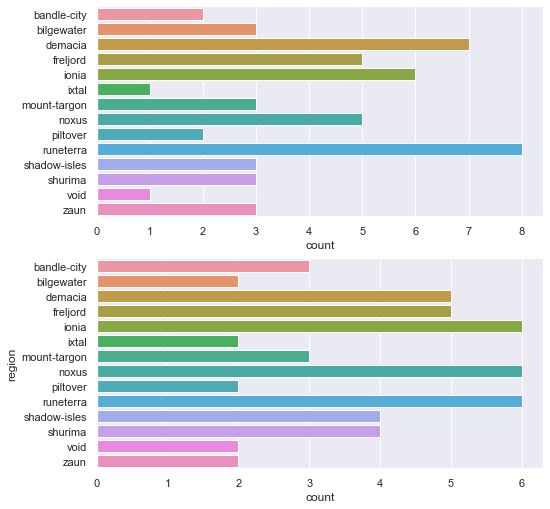

In [655]:
fig, ax =plt.subplots(2,1)
sns.set(rc={'figure.figsize':(8,8.5)})
predictions_story_full.sort(axis=0)
sns.countplot(y=predictions_story_full, ax=ax[0])

sns.countplot(y=y_test_fs.sort_values(), ax=ax[1])

## Assumptions of errors 

We can see that in all Runeterra, Demacia and Ionia, word "would" is written many times, which may lead to the assumption, that a champion is from Runeterra region, when is actually for another region (for instance from Ionia).

In [656]:
runeterra_tokens = get_tokens_from_story("runeterra")
demacia_tokens = get_tokens_from_story("demacia")


print("\nRuneterra")
unigram = FreqDist(runeterra_tokens)
for word, frequency in unigram.most_common(10):
  print(str(word),":",frequency)

print("\nIonia")
unigram = FreqDist(ionia_tokens)
for word, frequency in unigram.most_common(10):
  print(str(word),":",frequency)

print("\nDemacia")
unigram = FreqDist(demacia_tokens)
for word, frequency in unigram.most_common(10):
  print(str(word),":",frequency)


Runeterra
would : 51
senna : 49
one : 44
could : 43
world : 43
lucian : 41
time : 33
even : 33
mage : 26
dark : 26

Ionia
would : 63
could : 61
one : 45
spirit : 39
yasuo : 37
master : 36
zed : 36
noxian : 36
land : 36
even : 34

Demacia
would : 71
one : 45
vayn : 43
magic : 39
could : 37
jarvan : 36
famili : 33
time : 33
king : 27
day : 27


If we look at Noxus' of Freljord's unigrams, we can see that there's a whole different unigrams,\n 
for Noxus: 
- Empir
- Noxian
- Swain

for Freljord:
- Tribe
- Freljord
- Ice


In [658]:
noxus_tokens = get_tokens_from_story("noxus")
freljord_tokens = get_tokens_from_story("freljord")

print("\nNoxus")
unigram = FreqDist(noxus_tokens)
for word, frequency in unigram.most_common(10):
  print(str(word),":",frequency)

print("\nFreljord")
unigram = FreqDist(freljord_tokens)
for word, frequency in unigram.most_common(10):
  print(str(word),":",frequency)


Noxus
could : 40
empir : 33
would : 32
noxian : 32
swain : 32
even : 30
gener : 30
mani : 27
one : 25
rose : 23

Freljord
would : 58
tribe : 53
could : 40
one : 37
even : 30
ash : 29
ice : 26
power : 25
magic : 22
mother : 22
